In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
from collections import Counter as c   #importing collections
from matplotlib.pyplot import plot  #importing matplotlib llibrary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df=pd.read_csv(r'C:\Users\athir\Desktop\visa\h1b_kaggle.csv')
df.shape

(3002458, 11)

In [4]:
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
5,6,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.00,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
6,7,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.00,2016.0,"HOUSTON, TEXAS",-95.369803,29.760427
7,8,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.00,2016.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
8,9,CERTIFIED-WITHDRAWN,ESI COMPANIES INC.,CHIEF EXECUTIVES,PRESIDENT,Y,127546.00,2016.0,"MEMPHIS, TEXAS",NaN,NaN
9,10,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.00,2016.0,"VIENNA, VIRGINIA",-77.265260,38.901222


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [6]:
df.CASE_STATUS.value_counts() 

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

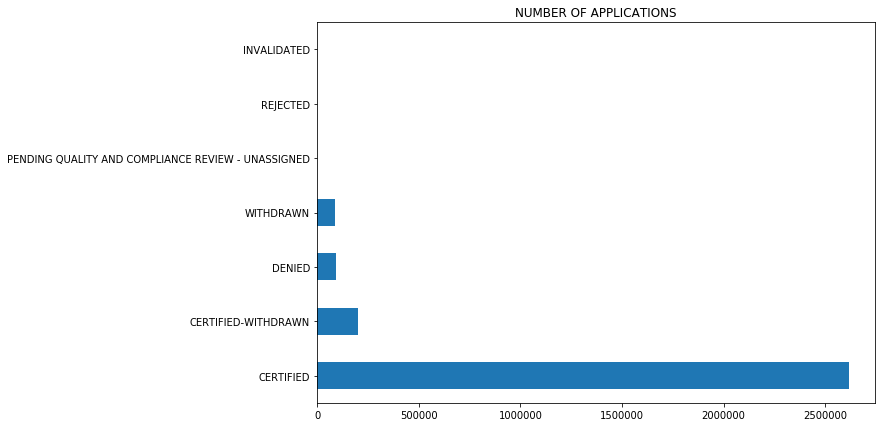

In [7]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh')
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

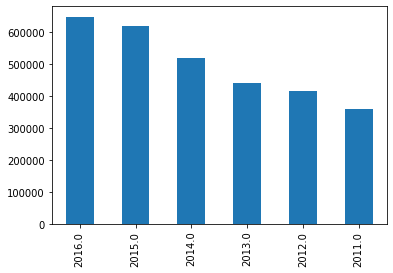

In [8]:
df.YEAR.value_counts().plot(kind = 'bar')

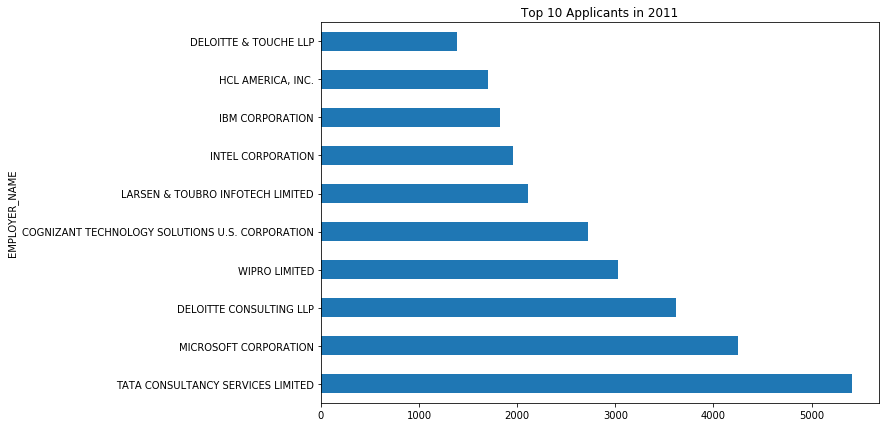

In [9]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2011].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2011")
ax1.set_label("")
plt.show()

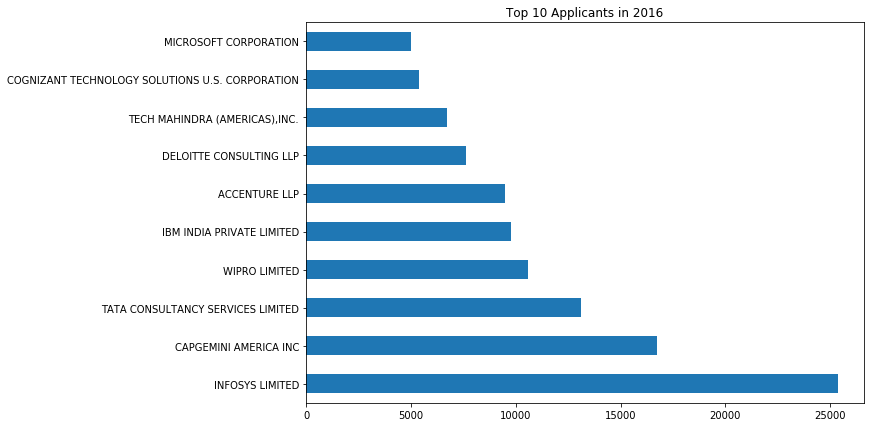

In [10]:
plt.figure(figsize=(10,7))

ax2 = df['EMPLOYER_NAME'][df['YEAR'] == 2016].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in 2016'
                                                                                                                             )
ax2.set_ylabel("")
plt.show()

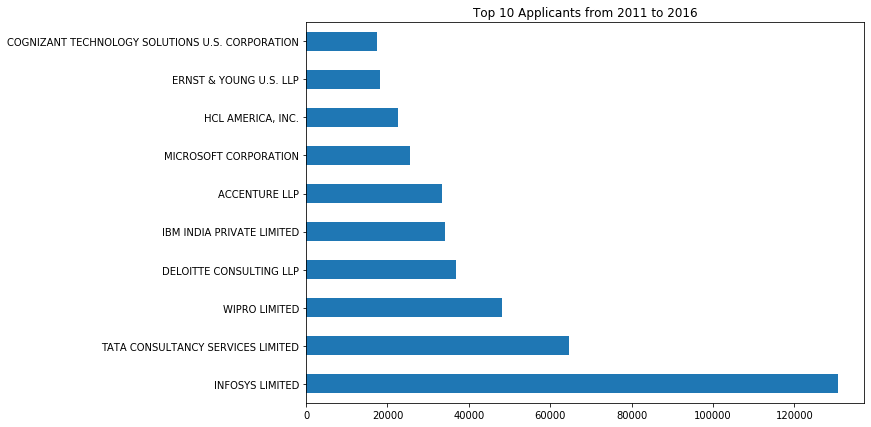

In [11]:
plt.figure(figsize=(10,7))

ax3 = df['EMPLOYER_NAME'].groupby([df['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'Top 10 Applicants from 2011 to 2016')
                                                                                                           
ax3.set_ylabel("")
plt.show()

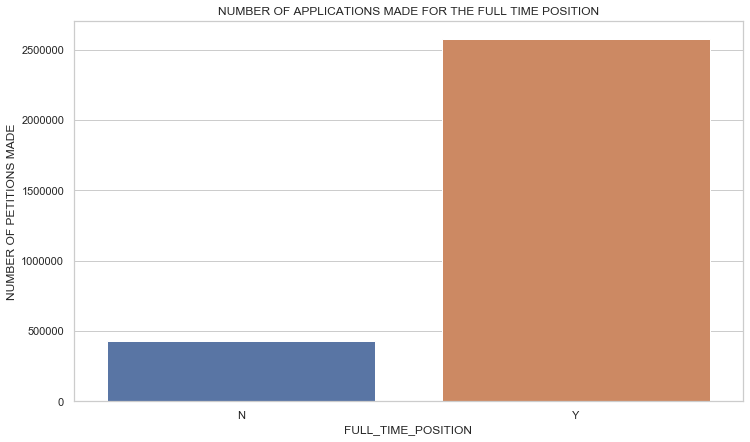

In [12]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

In [13]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

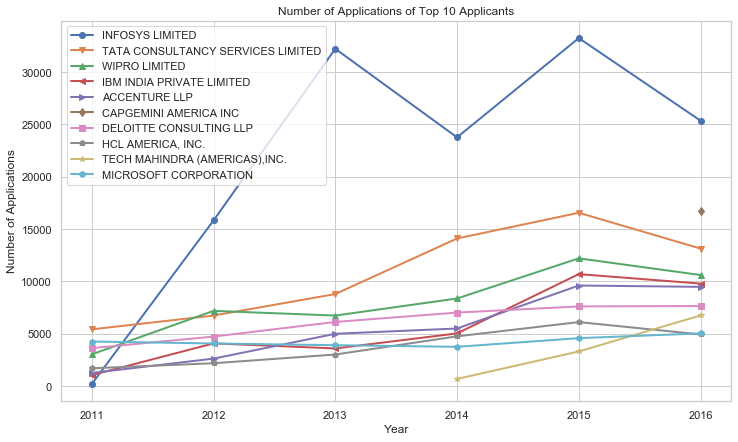

In [14]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d',
         's','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company,
             linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

## Removing Outliers

In [15]:
df = df[df['PREVAILING_WAGE'] <= 500000]
by_emp_year = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([df['EMPLOYER_NAME'],df['YEAR']])

## Checking for Null values

In [16]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [17]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])

C:\Users\athir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME                   0
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

## Label Encoding Case status

In [19]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4,'REJECTED' : 5, 'INVALIDATED' : 6})

C:\Users\athir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head()

C:\Users\athir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,1,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,1,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,1,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,3,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [21]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')] = 'manager'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('database')] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales','market')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('financial')] = 'finance'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('education','law')] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers')] = 'education'

C:\Users\athir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\athir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\athir\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._

In [22]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)

In [23]:
df.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_NAME1
0,1,0,36067.0,2016.0,others
1,1,1,242674.0,2016.0,others
2,1,1,193066.0,2016.0,others
3,1,1,220314.0,2016.0,others
4,3,1,157518.4,2016.0,others


In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])

In [25]:
df = df.drop(['SOC_NAME1'], axis=1)

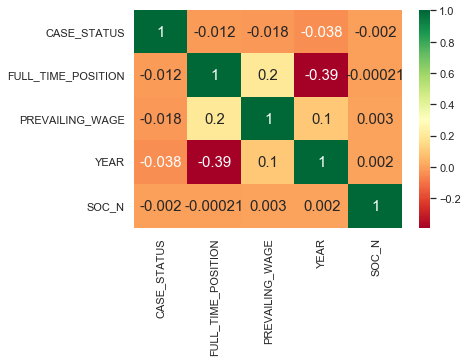

In [26]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [27]:
df.isnull().sum()

CASE_STATUS           0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
SOC_N                 0
dtype: int64

In [28]:
selcols=["FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","SOC_N"]
x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['CASE_STATUS'])

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Modelling Fitting by using RandomForest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\athir\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\athir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred_rf =rf.predict(x_test)
print(y_pred_rf)

[0 0 0 ... 0 0 0]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

C:\Users\athir\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    784458
           1       0.46      0.09      0.16     60711
           2       0.24      0.04      0.07     27545
           3       0.15      0.01      0.02     27253
           4       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.87    899974
   macro avg       0.29      0.19      0.20    899974
weighted avg       0.81      0.87      0.82    899974



In [33]:
c(y_pred_rf)

Counter({0: 880754, 1: 12431, 2: 4909, 3: 1880})

In [34]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.868083966870154

In [35]:
import pickle
pickle.dump(rf,open('Visarf.pkl','wb'))